### Задание 1
Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
df = pd.read_csv('HR.csv')

### Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [2]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [4]:
import seaborn as sns

corr = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr().abs()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,0.142970,0.020048,0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

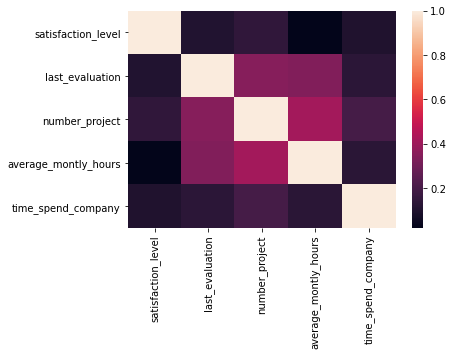

In [5]:
sns.heatmap(corr)

In [6]:
sorted_corr = corr.unstack()
sorted_corr = sorted_corr[ sorted_corr != 1].sort_values()
print(sorted_corr.keys()[0], sorted_corr.keys()[-1])

('satisfaction_level', 'average_montly_hours') ('average_montly_hours', 'number_project')


* Наибольшая корреляция наблюдается между средним числом рабочих часов в неделю и числом завершенных проектов (average_montly_hours и number_projects)  
* Наименьшая корреляция наблюдается между средним числом рабочих часов в неделю и уровнем удовлетворенности работой (average_montly_hours и satisfaction_level)

### Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [7]:
active_df = df[ df.left == 0 ]
active_df.groupby('department')['left'].count()

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

### Задание 5
Показать распределение сотрудников по зарплатам.

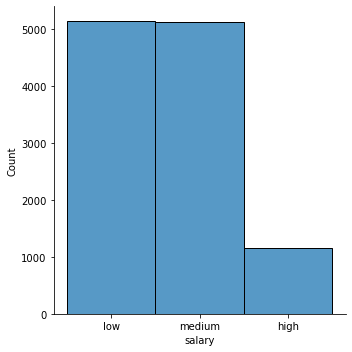

In [8]:
import matplotlib.pyplot as plt

def show_salary_distribution(df, dep = False):
    ax = sns.displot(df.salary)
    if dep:
        plt.title(dep)
    plt.show()
    
show_salary_distribution(active_df)

### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

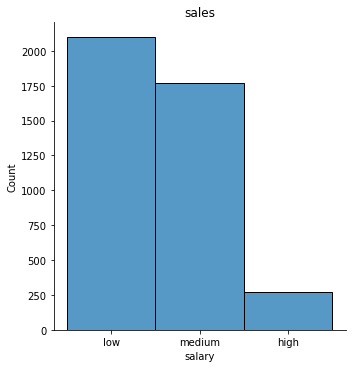

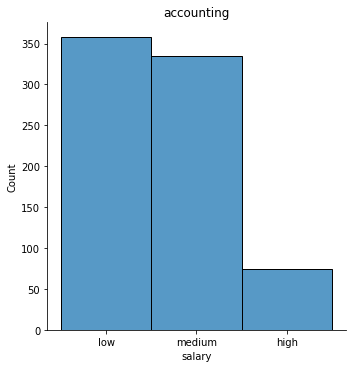

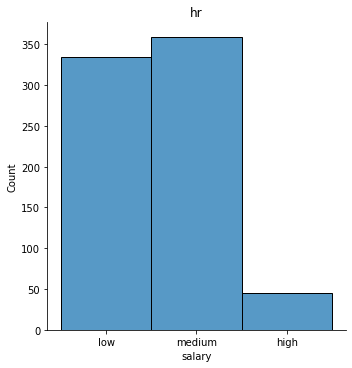

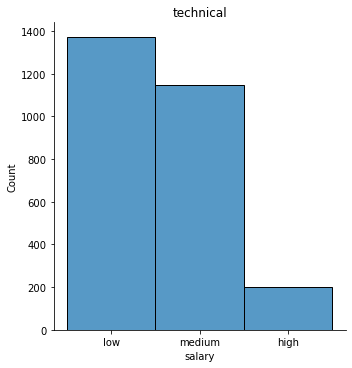

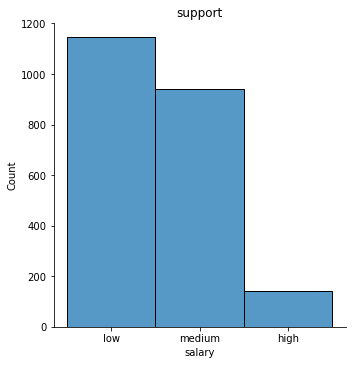

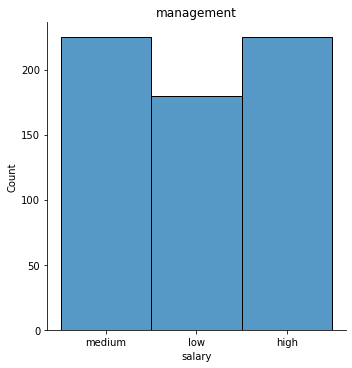

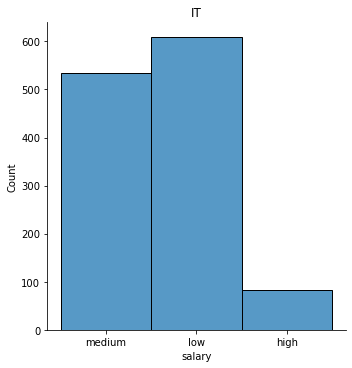

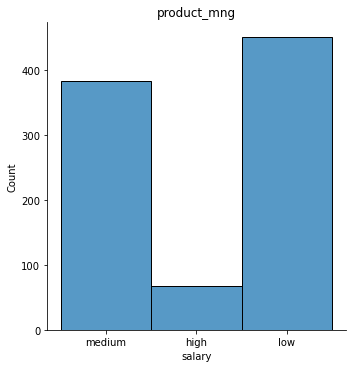

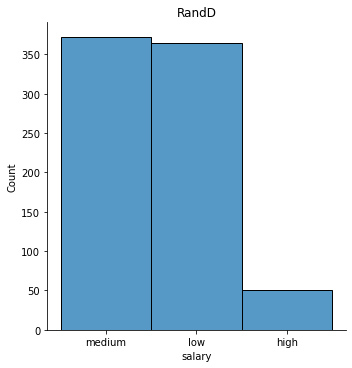

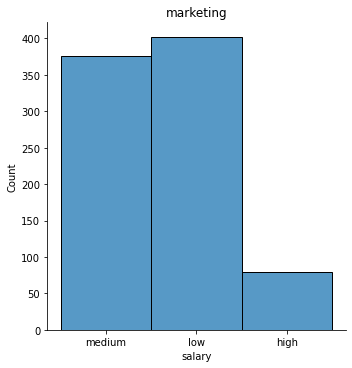

In [9]:
for dep in active_df.department.unique():
    show_salary_distribution(df[df.department == dep], dep)

### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [10]:
from scipy import stats

low_salary_df = df[df.salary == 'low']
high_salary_df = df[df.salary == 'high']
t, p = stats.ttest_ind(low_salary_df.average_montly_hours, high_salary_df.average_montly_hours)
t, p

(0.7288680398062308, 0.4661023478267259)

P-критерий 47%, гипотеза не подтверждена

### Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [11]:
active_promoted_df = active_df[active_df.promotion_last_5years == 1]
print('Доля работающих сотрудников с повышением за последние 5 лет:', active_promoted_df.left.size / active_df.left.size)

left_df = df[ df.left == 1 ]
left_promoted_df = left_df[left_df.promotion_last_5years == 1]
print('Доля уволившихся сотрудников с повышением за последние 5 лет:', left_promoted_df.left.size / left_df.left.size)

print('Средняя степень удовлетворенности работающих сотрудников:', active_df.satisfaction_level.mean())
print('Средняя степень удовлетворенности уволившихся сотрудников:', left_df.satisfaction_level.mean())

print('Среднее количество проектов работающих сотрудников:', active_df.number_project.mean())
print('Средняя количество проектов уволившихся сотрудников:', left_df.number_project.mean())

Доля работающих сотрудников с повышением за последние 5 лет: 0.026251312565628283
Доля уволившихся сотрудников с повышением за последние 5 лет: 0.005320638476617194
Средняя степень удовлетворенности работающих сотрудников: 0.666809590479516
Средняя степень удовлетворенности уволившихся сотрудников: 0.44009801176140917
Среднее количество проектов работающих сотрудников: 3.786664333216661
Средняя количество проектов уволившихся сотрудников: 3.8555026603192384


### Задание 9
Разделить данные на тестовую и обучающую выборки.  
Построить модель LDA, предсказывающую, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).  
Оценить качество модели на тестовой выборке

In [12]:
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

np.random.seed(42)
data = df[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
]]
target = df.left

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, target_train)
print('Коэффициент детерминации построенной модели:')
print(lda.score(data_test, target_test))

Коэффициент детерминации построенной модели:
0.7536


Коэффициент детерминации 0.7536 говорит о том, что построенная модель достаточно качественная, хоть и не идеальная